In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time
from scipy.stats import percentileofscore
import pyod
from pyod.models.knn import KNN
from scipy import stats 
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from scipy.stats import gaussian_kde

# Defining the applicability domains of hemolytic models

## HemoPI-1 

### Get (normalized) physicochemical properties 

In [2]:
import os
os.chdir('/home/User/some_dir/Github_HAPMOD')

In [3]:
X_HemoPI1_model = pd.read_csv('./Descriptors/norm_HemoPI1_model.csv', index_col=0)
X_HemoPI1_model

,H_Eisenberg,uH_Eisenberg,H_GRAVY,uH_GRAVY,Z3_1,Z3_2,Z3_3,Z5_1,Z5_2,Z5_3,...,u_TM_tend,Length,BomanIndex,Aromaticity,AliphaticIndex,InstabilityIndex,NetCharge,MW,IsoelectricPoint,HydrophobicRatio
# ID,,,,,,,,,,,,,,,,,,,,,
peptide_pm_1,0.750249,0.321136,0.725739,0.522383,0.404082,0.776335,0.339747,0.371125,0.744425,0.342660,...,0.445634,0.180851,0.208411,0.071429,0.458740,0.134440,0.341862,0.153523,0.695106,0.619048
peptide_pm_2,0.532058,0.388682,0.516632,0.493929,0.500272,0.131189,0.316909,0.507289,0.202185,0.289975,...,0.494287,0.234043,0.418637,0.173077,0.396799,0.154814,0.443089,0.250092,0.856694,0.454545
peptide_pm_3,0.675110,0.575125,0.611281,0.611229,1.000000,0.041518,0.324850,0.834891,0.206068,0.287612,...,0.740552,0.053191,0.332182,1.000000,0.000000,0.065358,0.349033,0.081794,0.811973,0.787879
peptide_pm_4,0.418955,0.521833,0.505407,0.666085,0.620684,0.018166,0.539126,0.678879,0.003472,0.451345,...,0.691562,0.127660,0.379178,0.000000,0.666149,0.053482,0.465369,0.144131,0.863023,0.590909
peptide_pm_5,0.689284,0.010035,0.650197,0.021779,0.213289,0.293669,0.420437,0.207083,0.426686,0.418862,...,0.063325,0.276596,0.328713,0.100000,0.299482,0.267986,0.234396,0.254404,0.059629,0.590909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peptide_nm_438,0.454817,0.523470,0.493961,0.547470,0.247384,0.147779,0.193945,0.287722,0.307044,0.294151,...,0.498480,0.021277,0.634102,0.000000,0.335921,0.452078,0.279235,0.021639,0.405213,0.590909
peptide_nm_439,0.362601,0.160358,0.304844,0.047898,0.298330,0.164598,0.317859,0.312519,0.142948,0.294125,...,0.034646,0.191489,0.645547,0.068182,0.136646,0.290615,0.325775,0.192654,0.741374,0.268595
peptide_nm_440,0.335907,0.045865,0.143506,0.101054,0.298889,0.041597,0.162665,0.407868,0.062042,0.139706,...,0.159840,0.159574,0.765781,0.315789,0.000000,0.450858,0.140433,0.190366,0.098162,0.124402


In [4]:
y_HemoPI1_model = np.zeros(len(X_HemoPI1_model))
y_HemoPI1_model[X_HemoPI1_model.index.str.contains('nm')] = 1

### t-SNE

In [5]:
#Convert X_HemoPI-1 dataset into numpy array t-SNE with 2 dimensions
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity = 30)
tsne_hp1 = TSNE(random_state=42).fit_transform(X_HemoPI1_model)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

tsne_hp1_df = pd.DataFrame(data = tsne_hp1, columns = ['t-SNE 1', 't-SNE 2'], index=X_HemoPI1_model.index.values)


t-SNE done! Time elapsed: 6.785827159881592 seconds


### average KNN outlier score

In [6]:
X = X_HemoPI1_model
outliers_fraction = 0.05

# predict raw anomaly score
clf = KNN(method='mean',contamination=outliers_fraction)
clf.fit(X)
scores_pred = clf.decision_function(X)
y_pred = clf.predict(X)

n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print('OUTLIERS : ',n_outliers,'/ INLIERS : ',n_inliers, "Method: Average KNN")

#percentile outlier score calculation
n = np.size(scores_pred)
percentile_scores = np.empty(n)
for i in np.arange(n):
    percentile_scores[i] = percentileofscore(scores_pred, scores_pred[i])

#oulier Threshold calculation
outlierThreshold = np.min(scores_pred[y_pred==1])
print('outlier threshold:', outlierThreshold)

# copy of dataframe
dfx = tsne_hp1_df
dfx['outlier'] = y_pred.tolist()
dfx['yn'] = scores_pred.tolist() 


OUTLIERS :  9 / INLIERS :  875 Method: Average KNN
outlier threshold: 0.9930214121432173


## HAMP

In [7]:
X_HAMP_hp1 = pd.read_csv('./Descriptors/norm_HAMP_hp1.csv', index_col=0)

#t-sne
time_start = time.time()
X = X_HAMP_hp1
tsne = TSNE(n_components=2, verbose=1, perplexity = 100)
tsne_mod = TSNE(random_state=42).fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne_HAMP_df = pd.DataFrame(data = tsne_mod, columns = ['t-SNE 1', 't-SNE 2'], index=X.index.values)

# predict raw anomaly score
scores_pred_HAMP = clf.decision_function(X)
category_pred_HAMP = np.zeros(len(scores_pred_HAMP))
category_pred_HAMP[scores_pred_HAMP >= outlierThreshold] = 1

# copy of dataframe
dfx = tsne_HAMP_df
dfx['outlier'] = category_pred_HAMP.tolist()


t-SNE done! Time elapsed: 2.316894292831421 seconds


## APD

In [8]:
X_totalAPD_hp1 = pd.read_csv('./Descriptors/norm_totalAPD_hp1.csv', index_col=0)

#t-sne
time_start = time.time()
X = X_totalAPD_hp1
tsne = TSNE(n_components=2, verbose=1, perplexity = 100)
tsne_mod = TSNE(random_state=42).fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne_ADP_df = pd.DataFrame(data = tsne_mod, columns = ['t-SNE 1', 't-SNE 2'], index=X.index.values)

# predict raw anomaly score
scores_pred_ADP = clf.decision_function(X)
category_pred_ADP = np.zeros(len(scores_pred_ADP))
category_pred_ADP[scores_pred_ADP >= outlierThreshold] = 1

# copy of dataframe
dfx = tsne_ADP_df
dfx['outlier'] = category_pred_ADP.tolist()

t-SNE done! Time elapsed: 25.060380697250366 seconds


### t-SNE projections showing the distributions of HemoPI-1 model, APD and HAMP datasets with the following labels; A) their respective consensus class probabilities, B) their classifications as inliers, outliers or novelties and, C) their outlier scores predictions.

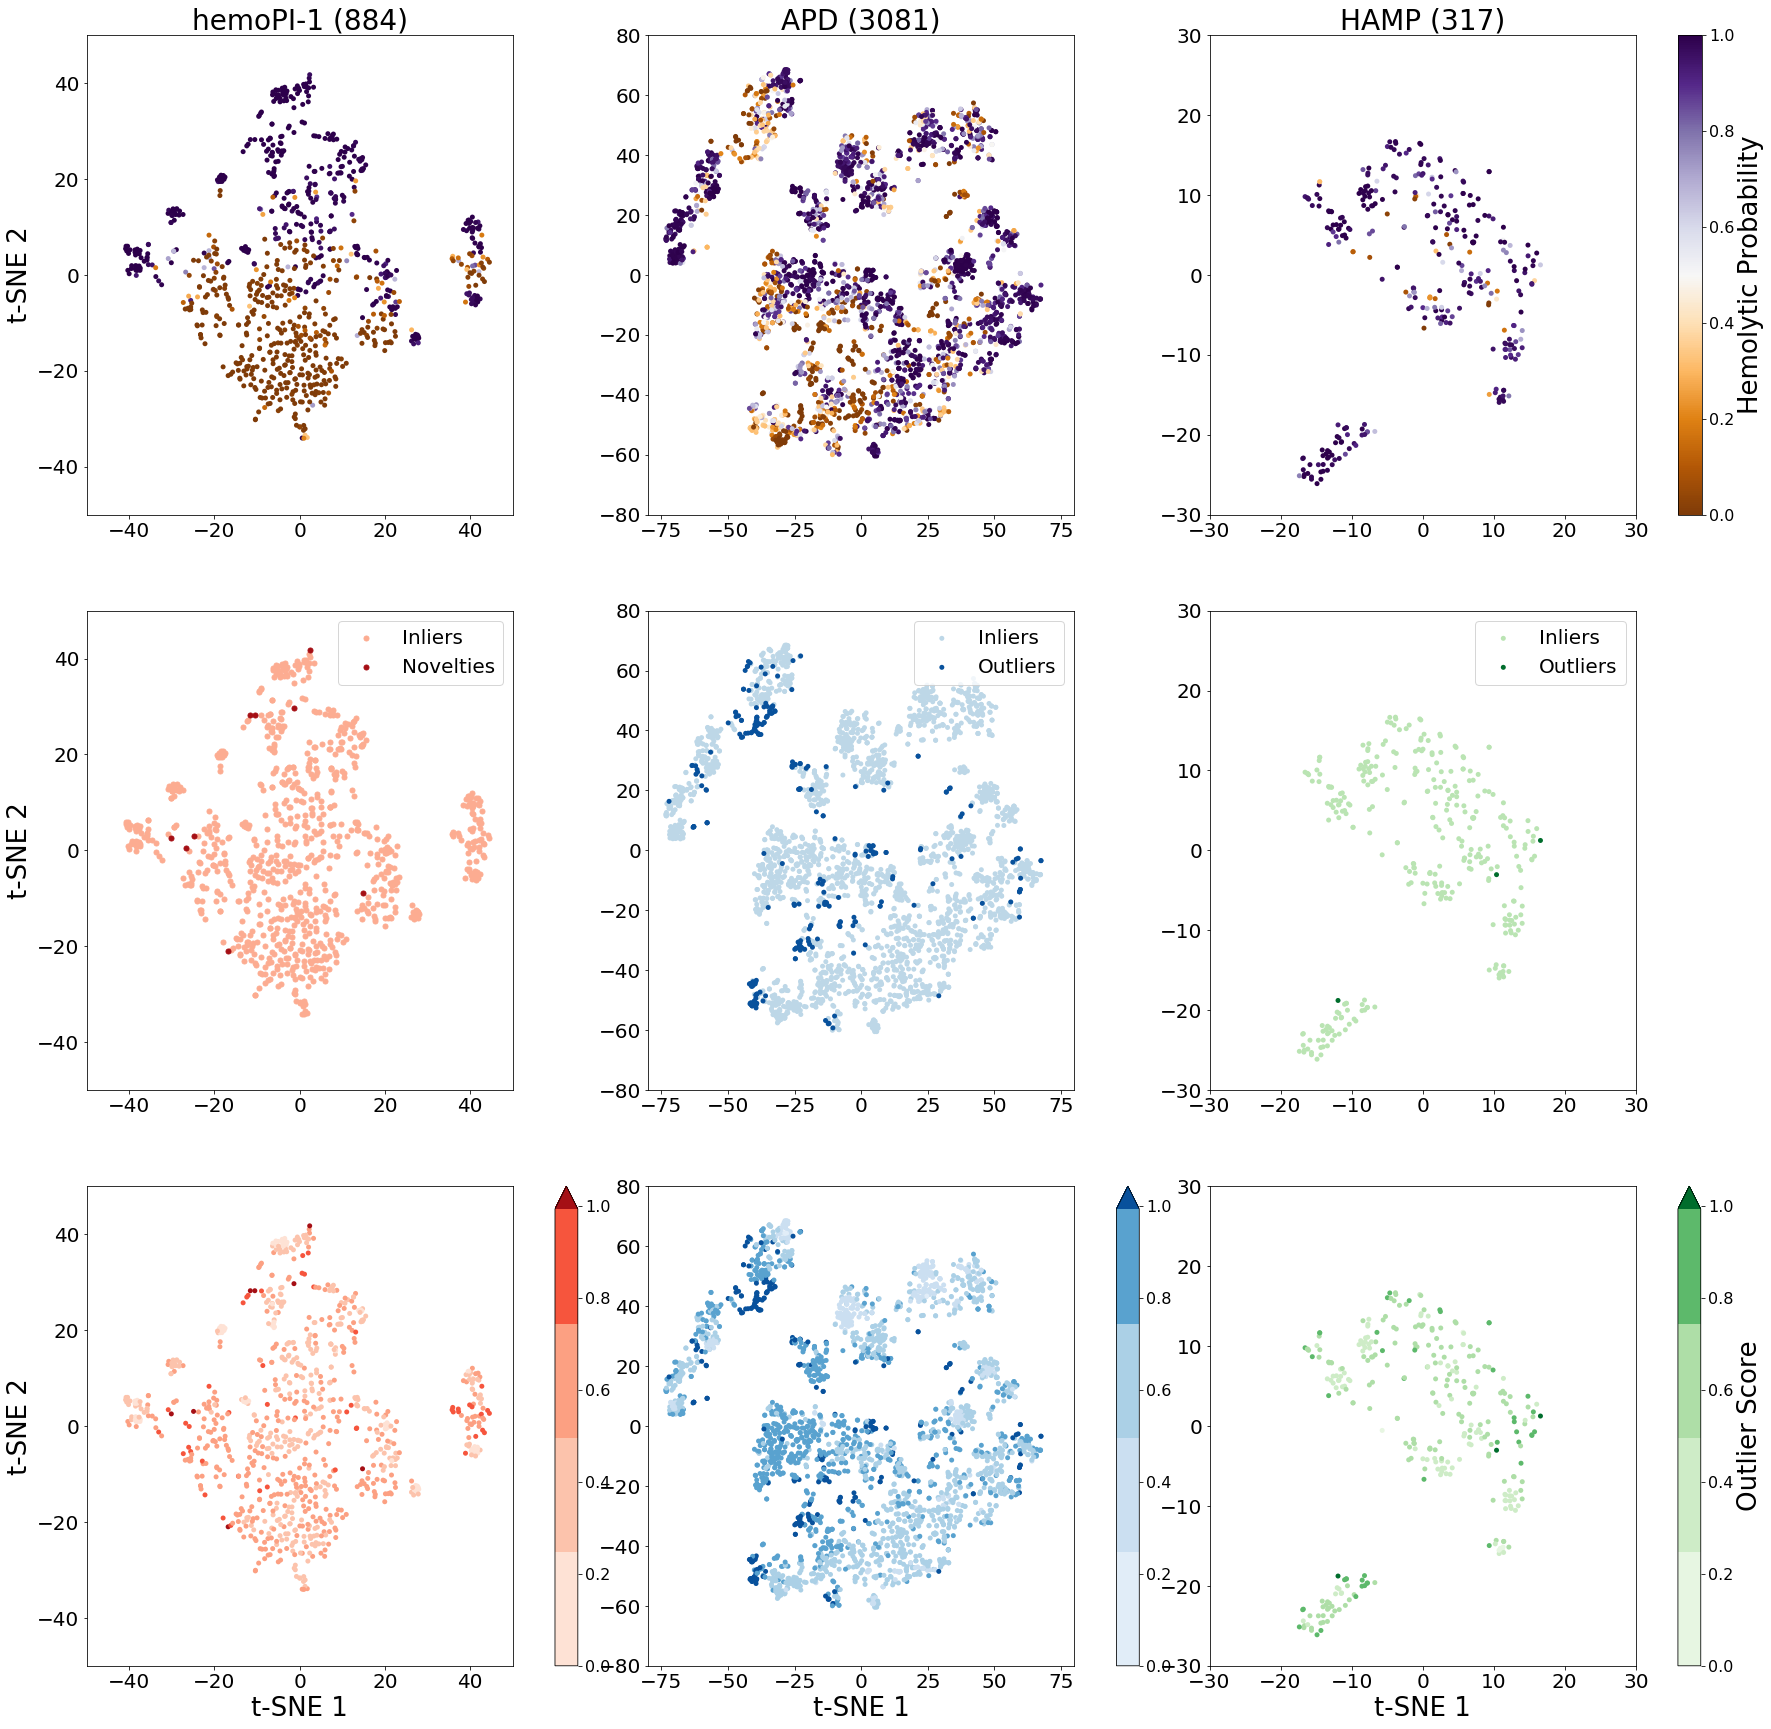

In [9]:
plt.figure(figsize=(30,30))
grid = plt.GridSpec(3, 27)
tickSize = 20
clrbarTickSize = 16
xylabeSize = 26
titleSize = 28
boundsPerc = [0, 20, 40, 60, 80, 100]
bounds = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
fntweight = "normal"

##### ROW 1 ######
#hemoPI-1
IX1 =  np.array(tsne_hp1_df['t-SNE 1'])
IX2 =  np.array(tsne_hp1_df['t-SNE 2'])

#class probabilities
probs_hemoPI1 = pd.read_csv('./Results/predictions_models_HemoPI1.csv', index_col=0)

plt.subplot(grid[0, :7])
a=plt.scatter(IX1,IX2, c=probs_hemoPI1['consensus_probability_1'], s=25, edgecolor='none', marker='o', cmap='PuOr', vmax=1, vmin=0)
plt.xlim((-50, 50))
plt.ylim((-50, 50))
plt.xlabel('', fontsize=xylabeSize)
plt.ylabel('t-SNE 2', fontsize=xylabeSize, fontweight=fntweight)
plt.title('hemoPI-1 (884)', fontsize=titleSize, fontweight=fntweight)
plt.tick_params(labelsize=tickSize)

#APD
IX1 =  np.array(tsne_ADP_df['t-SNE 1'])
IX2 =  np.array(tsne_ADP_df['t-SNE 2'])

#class probabilities
probs_APD = pd.read_csv('./Results/predictions_totalAPD_HemoPI1_topmodels.csv', index_col=0)

plt.subplot(grid[0, 9:16])
a=plt.scatter(IX1,IX2, c=probs_APD['consensus_probability_1'], s=25, edgecolor='none', marker='o', cmap='PuOr', vmax=1, vmin=0)
plt.xlim((-80, 80))
plt.ylim((-80, 80))
plt.xlabel('', fontsize=xylabeSize)
plt.ylabel('', fontsize=xylabeSize)
plt.title('APD (3081)', fontsize=titleSize)
plt.tick_params(labelsize=tickSize)

#HAMP
IX1 =  np.array(tsne_HAMP_df['t-SNE 1'])
IX2 =  np.array(tsne_HAMP_df['t-SNE 2'])

#class probabilities
probs_HAMP = pd.read_csv('./Results/predictions_HAMP_HemoPI1_topmodels.csv', index_col=0)

plt.subplot(grid[0, 18:27])
a=plt.scatter(IX1,IX2, c=probs_HAMP['consensus_probability_1'],s=25, edgecolor='none', marker='o', cmap='PuOr', vmax=1, vmin=0)
b=plt.colorbar(extend='neither', ticks=bounds)
b.ax.tick_params(labelsize=clrbarTickSize)
b.set_label(label='Hemolytic Probability', size=xylabeSize)

plt.subplot(grid[0, 18:25])
a=plt.scatter(IX1,IX2, c=probs_HAMP['consensus_probability_1'],s=25, edgecolor='none', marker='o', cmap='PuOr', vmax=1, vmin=0)
plt.xlim((-30, 30))
plt.ylim((-30, 30))
plt.xlabel('', fontsize=xylabeSize)
plt.ylabel('', fontsize=xylabeSize)
plt.title('HAMP (317)', fontsize=titleSize)
plt.tick_params(labelsize=tickSize)


##### ROW 2 ######
#hemoPI-1
dfx = tsne_hp1_df
dfx['outlier'] = y_pred.tolist()
dfx['yn'] = scores_pred.tolist() 

IX1 =  np.array(dfx['t-SNE 1'][dfx['outlier'] == 0])
IX2 =  np.array(dfx['t-SNE 2'][dfx['outlier'] == 0])   
OX1 =  dfx['t-SNE 1'][dfx['outlier'] == 1].values
OX2 =  dfx['t-SNE 2'][dfx['outlier'] == 1].values

plt.subplot(grid[1, :7])
a=plt.scatter(IX1,IX2, c='#fcac91',s=25)
b=plt.scatter(OX1,OX2, c='#a50f15',s=25)
plt.xlim((-50, 50))
plt.ylim((-50, 50))
plt.xlabel('', fontsize=xylabeSize)
plt.ylabel('t-SNE 2', fontsize=xylabeSize)
plt.title('', fontsize=titleSize)
plt.legend([a,b],['Inliers','Novelties'],prop= matplotlib.font_manager.FontProperties(size=20), loc=1)
plt.tick_params(labelsize=tickSize)

#APD
dfx = tsne_ADP_df
dfx['outlier'] = category_pred_ADP.tolist()

IX1 =  np.array(dfx['t-SNE 1'][dfx['outlier'] == 0])
IX2 =  np.array(dfx['t-SNE 2'][dfx['outlier'] == 0])   
OX1 =  dfx['t-SNE 1'][dfx['outlier'] == 1].values
OX2 =  dfx['t-SNE 2'][dfx['outlier'] == 1].values

plt.subplot(grid[1, 9:16])
a=plt.scatter(IX1,IX2, c='#bdd7e7',s=25, edgecolor='none')
b=plt.scatter(OX1,OX2, c='#08519c',s=25, edgecolor='none')
plt.xlim((-80, 80))
plt.ylim((-80, 80))
plt.xlabel('', fontsize=xylabeSize)
plt.ylabel('', fontsize=xylabeSize)
plt.title('', fontsize=titleSize)
plt.legend([a,b],['Inliers','Outliers'],prop= matplotlib.font_manager.FontProperties(size=20), loc=1)
plt.tick_params(labelsize=tickSize)

#HAMP
dfx = tsne_HAMP_df
dfx['outlier'] = category_pred_HAMP.tolist()

IX1 =  np.array(dfx['t-SNE 1'][dfx['outlier'] == 0])
IX2 =  np.array(dfx['t-SNE 2'][dfx['outlier'] == 0])   
OX1 =  dfx['t-SNE 1'][dfx['outlier'] == 1].values
OX2 =  dfx['t-SNE 2'][dfx['outlier'] == 1].values

plt.subplot(grid[1, 18:25])
a=plt.scatter(IX1,IX2, c='#bae4b3',s=25, edgecolor='none')
b=plt.scatter(OX1,OX2, c='#006d2c',s=25, edgecolor='none')
plt.xlim((-30, 30))
plt.ylim((-30, 30))
plt.xlabel('', fontsize=xylabeSize)
plt.ylabel('', fontsize=xylabeSize)
plt.title('', fontsize=titleSize)
plt.legend([a,b],['Inliers','Outliers'],prop= matplotlib.font_manager.FontProperties(size=20), loc=1)
plt.tick_params(labelsize=tickSize)


##### ROW 3 ######
#hemoPI-1
dfx = tsne_hp1_df
IX1 =  np.array(tsne_hp1_df['t-SNE 1'])
IX2 =  np.array(tsne_hp1_df['t-SNE 2'])

cmap  = plt.get_cmap('Reds', 10)
cmap = ListedColormap(cmap(np.linspace(0.15, 0.50, 4)))
cmap.set_over('#a50f15')

plt.subplot(grid[2, :9])
a=plt.scatter(IX1,IX2, c=scores_pred,s=25, edgecolor='none', marker='o', cmap=cmap, vmax=outlierThreshold, vmin=0)
b=plt.colorbar(extend='max', ticks=bounds)
b.ax.tick_params(labelsize=clrbarTickSize)

plt.subplot(grid[2, :7])
a=plt.scatter(IX1,IX2, c=scores_pred,s=25, edgecolor='none', marker='o', cmap=cmap, vmax=outlierThreshold, vmin=0)
plt.xlim((-50, 50))
plt.ylim((-50, 50))
plt.xlabel('t-SNE 1', fontsize=xylabeSize)
plt.ylabel('t-SNE 2', fontsize=xylabeSize)
plt.title('', fontsize=titleSize)
plt.tick_params(labelsize=tickSize)

#APD
dfx = tsne_ADP_df
IX1 =  np.array(tsne_ADP_df['t-SNE 1'])
IX2 =  np.array(tsne_ADP_df['t-SNE 2'])

cmap  = plt.get_cmap('Blues', 10)
cmap = ListedColormap(cmap(np.linspace(0.15, 0.50, 4)))
cmap.set_over('#08519c')

plt.subplot(grid[2, 9:18])
a=plt.scatter(IX1,IX2, c=scores_pred_ADP,s=25, edgecolor='none', marker='o', cmap=cmap, vmax=outlierThreshold, vmin=0)
b=plt.colorbar(extend='max', ticks=bounds)
b.ax.tick_params(labelsize=clrbarTickSize)

plt.subplot(grid[2, 9:16])
a=plt.scatter(IX1,IX2, c=scores_pred_ADP,s=25, edgecolor='none', marker='o', cmap=cmap, vmax=outlierThreshold, vmin=0)
plt.xlim((-80, 80))
plt.ylim((-80, 80))
plt.xlabel('t-SNE 1', fontsize=xylabeSize)
plt.ylabel('', fontsize=xylabeSize)
plt.title('', fontsize=titleSize)
plt.tick_params(labelsize=tickSize)

#HAMP
IX1 =  np.array(tsne_HAMP_df['t-SNE 1'])
IX2 =  np.array(tsne_HAMP_df['t-SNE 2'])

cmap  = plt.get_cmap('Greens', 10)
cmap = ListedColormap(cmap(np.linspace(0.15, 0.50, 4)))
cmap.set_over('#006d2c')

plt.subplot(grid[2, 18:27])
a=plt.scatter(IX1,IX2, c=scores_pred_HAMP,s=25, edgecolor='none', marker='o', cmap=cmap, vmax=outlierThreshold, vmin=0)
b=plt.colorbar(extend='max', ticks=bounds)
b.ax.tick_params(labelsize=clrbarTickSize)
b.set_label(label='Outlier Score', size=xylabeSize)

plt.subplot(grid[2, 18:25])
a=plt.scatter(IX1,IX2, c=scores_pred_HAMP,s=25, edgecolor='none', marker='o', cmap=cmap, vmax=outlierThreshold, vmin=0)
plt.xlim((-30, 30))
plt.ylim((-30, 30))
plt.xlabel('t-SNE 1', fontsize=xylabeSize)
plt.ylabel('', fontsize=xylabeSize)
plt.title('', fontsize=titleSize)
plt.tick_params(labelsize=tickSize)

plt.show()

# Discovering non-hemolytic AMPs within the APD universe

In [10]:
probs_APD = pd.read_csv('./Results/predictions_totalAPD_HemoPI1_topmodels.csv', index_col=0)
scores_pred = scores_pred_ADP
total_APD = pd.read_csv('./Descriptors/total_APD.csv', index_col=0)

#percentile outlier score calculation
n = np.size(scores_pred)
percentile_scores = np.empty(n)
for i in np.arange(n):
    percentile_scores[i] = percentileofscore(scores_pred, scores_pred[i])


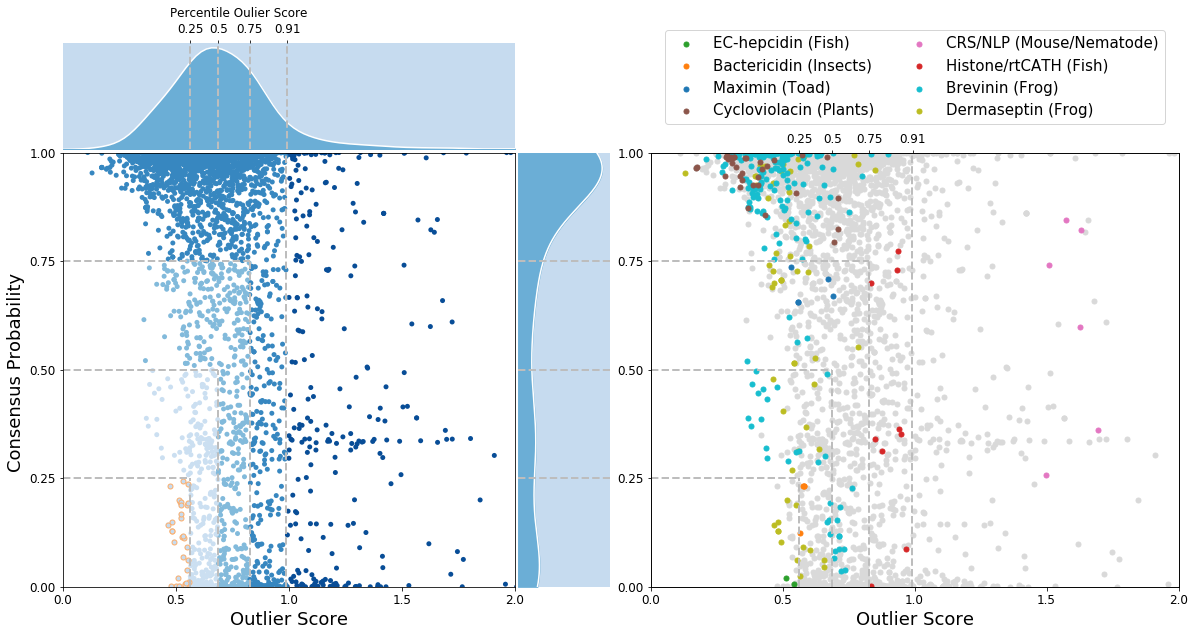

In [11]:
fig = plt.figure(figsize=(20,10))

#####################################
#######LEFT FIGURE##################
#####################################
grid = plt.GridSpec(30, 59)
hemo_probs = probs_APD['consensus_probability_1']
bins = 13
cmap = plt.get_cmap('tab20c')
rgbaPlot = cmap(1)
rgbaBackground = cmap(3)
lineColor = cmap(18)
edgecolor = cmap(6)
cmap2  = plt.get_cmap('Blues', 10)
cmap2 = ListedColormap(cmap2(np.linspace(0.10, 0.80, 5)))#discrete color gradient for scatter
perc25 = np.min(scores_pred[percentile_scores >= 25])
perc50 = np.min(scores_pred[percentile_scores >= 50])
perc75 = np.min(scores_pred[percentile_scores >= 75])
OSthreshold = outlierThreshold #0.99
percOSt = 1 - ( np.size(scores_pred[scores_pred > OSthreshold]) / np.size(scores_pred) )
percOSt = np.around(percOSt,2)

### TOP DENSITY
plt.subplot(grid[:6, :24])

#density plot
density = gaussian_kde(scores_pred)
xs = np.linspace(0,np.max(scores_pred),200)
density.covariance_factor = lambda : .25
density._compute_covariance()
a=plt.plot(xs, density(xs), color='white')
plt.fill_between(xs, density(xs), 0, color=rgbaPlot)
plt.ylim(0, 2)#specific for this plot
plt.xlim(0, 2)#specific for this plot

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, top=True, left=False, right=False)
plt.tick_params(labelbottom=False, labeltop=True, labelleft=False, labelright=False)
plt.xticks([perc25,perc50,perc75,OSthreshold], [.25,.5,.75,percOSt])
plt.yticks([], [])
plt.tick_params(labelsize=12)
plt.title(r"Percentile Oulier Score                          ")

plt.gca().set_facecolor(rgbaBackground)
plt.axvline(x=perc25, lw=2, color=lineColor, linestyle='--')
plt.axvline(x=perc50, lw=2, color=lineColor, linestyle='--')
plt.axvline(x=perc75, lw=2, color=lineColor, linestyle='--')
plt.axvline(x=OSthreshold, lw=2, color=lineColor, linestyle='--')

### SCATTER
plt.subplot(grid[6:, :24])
gradient_APD = np.zeros(len(percentile_scores))
gradient_APD[:] = 4
gradient_APD[scores_pred > .99 ] = 5
gradient_APD[(percentile_scores < 75) & (hemo_probs < .75) ] = 3
gradient_APD[(percentile_scores < 50) & (hemo_probs < .50) ] = 2
gradient_APD[(percentile_scores < 25) & (hemo_probs < .25)] = 1


idx = (percentile_scores < 25) & (hemo_probs < .25)
b=plt.scatter(scores_pred, hemo_probs, c=gradient_APD, cmap=cmap2, s=25, edgecolor='none')
a=plt.scatter(scores_pred[idx], hemo_probs[idx], color=rgbaBackground, edgecolor=edgecolor, s=25)

plt.plot([0, perc25], [.25, .25], '--', lw=2, color=lineColor)
plt.plot([0, perc50], [.50, .50], '--', lw=2, color=lineColor)
plt.plot([0, perc75], [.75, .75], '--', lw=2, color=lineColor)

plt.plot([perc25, perc25], [0, .25], '--', lw=2, color=lineColor)
plt.plot([perc50, perc50], [0, .50], '--', lw=2, color=lineColor)
plt.plot([perc75, perc75], [0, .75], '--', lw=2, color=lineColor)

plt.axvline(x=.99, lw=2, color=lineColor, linestyle='--')

plt.xticks(ticks=[0,.5,1,1.5,2],labels=['0.0','0.5','1.0','1.5','2.0'])
plt.yticks(ticks=[0,.25,.5,.75,1])
plt.xlim((0, 2))
plt.ylim((0, 1))
plt.xlabel('Outlier Score', fontsize=18)
plt.ylabel('Consensus Probability ', fontsize=18)
plt.tick_params(labelsize=12)

### RIGHT DENSITY
plt.subplot(grid[6:, 24:29])
#hist
#a=plt.hist(hemo_probs, bins=bins, orientation='horizontal',color=rgbaPlot, edgecolor='white', linewidth=2)

#density plot
density = gaussian_kde(hemo_probs)
xs = np.linspace(0,1,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
a=plt.plot(density(xs), xs, color='white')
plt.fill_betweenx(xs, density(xs), 0, color=rgbaPlot)
plt.xlim(0, 2.5)#specific for this plot

plt.ylim((0, 1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([], [])
plt.yticks([], [])
#plt.gca().axison = False
plt.gca().set_facecolor(rgbaBackground)
plt.axhline(y=.25, lw=2, color=lineColor, linestyle='--')
plt.axhline(y=.50, lw=2, color=lineColor, linestyle='--')
plt.axhline(y=.75, lw=2, color=lineColor, linestyle='--')


#####################################
#######RIGTH FIGURE##################
#####################################
cmap = plt.get_cmap('tab20c')
lineColor = cmap(18)
cmap2  = plt.get_cmap('tab10')

### SCATTER
ax1 = fig.add_subplot(grid[6:, 31:])

idx = np.zeros(len(percentile_scores))
idx[:] = 4
idx[percentile_scores > 91 ] = 5
idx[(percentile_scores < 75) & (hemo_probs < .75) ] = 3
idx[(percentile_scores < 50) & (hemo_probs < .50) ] = 2
idx[(percentile_scores < 25) & (hemo_probs < .25)] = 1

idx2 = np.zeros(len(percentile_scores))
auxIdx = (total_APD['Name/Class'].str.contains('EC')) & (idx==1)
idx2[auxIdx] = 1
auxIdx = (total_APD['Name/Class'].str.contains('Bactericidin')) & (idx==2)
idx2[auxIdx] = 2
auxIdx = (total_APD['Name/Class'].str.contains('Maximin')) & (idx==3)
idx2[auxIdx] = 3
auxIdx = (total_APD['Name/Class'].str.contains('Cycloviolacin'))  & (idx==4)
idx2[auxIdx] = 4
auxIdx = ((total_APD['Name/Class'].str.contains('CRSC')) | (total_APD['Name/Class'].str.contains('NLP'))) & (idx==5)
idx2[auxIdx] = 5
auxIdx = (total_APD['Name/Class'].str.contains('Brevinin')) 
idx2[auxIdx] = 6
auxIdx = (total_APD['Name/Class'].str.contains('Dermaseptin')) 
idx2[auxIdx] = 7
auxIdx = ((percentile_scores > 75) & (percentile_scores < 91))
auxIdx = ((total_APD['Name/Class'].str.contains('Histone')) | (total_APD['Name/Class'].str.contains('rtCATH'))) & auxIdx
idx2[auxIdx] = 8
idx2[idx2==0] = 9
g=ax1.scatter(scores_pred[idx2==9], hemo_probs[idx2==9], color=cmap(19), s=25, marker="o", edgecolor=cmap(19))
h=ax1.scatter(scores_pred[idx2==7], hemo_probs[idx2==7], color=cmap2(8), s=25, marker="o", edgecolor=cmap2(8))
f=ax1.scatter(scores_pred[idx2==6], hemo_probs[idx2==6], color=cmap2(9), s=25, marker="o", edgecolor=cmap2(9))
a=ax1.scatter(scores_pred[idx2==1], hemo_probs[idx2==1], color=cmap2(2), s=25, marker="o", edgecolor=cmap2(2))
b=ax1.scatter(scores_pred[idx2==2], hemo_probs[idx2==2], color=cmap2(1), s=25, marker="o", edgecolor=cmap2(1))
c=ax1.scatter(scores_pred[idx2==3], hemo_probs[idx2==3], color=cmap2(0), s=25, marker="o", edgecolor=cmap2(0))
d=ax1.scatter(scores_pred[idx2==4], hemo_probs[idx2==4], color=cmap2(5), s=25, marker="o", edgecolor=cmap2(5))
e=ax1.scatter(scores_pred[idx2==5], hemo_probs[idx2==5], color=cmap2(6), s=25, marker="o", edgecolor=cmap2(6))
i=ax1.scatter(scores_pred[idx2==8], hemo_probs[idx2==8], color=cmap2(3), s=25, marker="o", edgecolor=cmap2(3))


plt.plot([0, perc25], [.25, .25], '--', lw=2, color=lineColor)
plt.plot([0, perc50], [.50, .50], '--', lw=2, color=lineColor)
plt.plot([0, perc75], [.75, .75], '--', lw=2, color=lineColor)

plt.plot([perc25, perc25], [0, .25], '--', lw=2, color=lineColor)
plt.plot([perc50, perc50], [0, .50], '--', lw=2, color=lineColor)
plt.plot([perc75, perc75], [0, .75], '--', lw=2, color=lineColor)

plt.axvline(x=.99, lw=2, color=lineColor, linestyle='--')

plt.xticks(ticks=[0,.5,1,1.5,2],labels=['0.0','0.5','1.0','1.5','2.0'])
plt.yticks(ticks=[0,.25,.5,.75,1])

plt.xlim((0, 2))
plt.ylim((0, 1))
plt.xlabel('Outlier Score', fontsize=18)
plt.ylabel('', fontsize=18)
plt.tick_params(labelsize=12)

#secondary xticks
ax2 = ax1.twiny()
ax2.set_xlim((0,2))
X2tick_location= [perc25,perc50,perc75,OSthreshold]
ax2.set_xticks(X2tick_location)
ax2.set_xticklabels([.25,.5,.75,percOSt])
ax2.tick_params(labelsize=12)
#ax2.set_xlabel(r"Percentile Oulier Score")

plt.legend([a,b,c,d,e,i,f,h],
           ['EC-hepcidin (Fish)','Bactericidin (Insects)','Maximin (Toad)','Cycloviolacin (Plants)','CRS/NLP (Mouse/Nematode)','Histone/rtCATH (Fish)','Brevinin (Frog)','Dermaseptin (Frog)'],
           loc='upper center',  
           prop= matplotlib.font_manager.FontProperties(size=15),
           bbox_to_anchor=(.5, 1.30), 
           shadow=False, 
           ncol=2)


plt.show()

# Designing de novo non-hemolytic AMP-like peptides

In [12]:
simulatedIN_df = pd.read_csv('./Descriptors/norm_generated_inliers.csv', index_col=0)
simulatedIN_classProbs = pd.read_csv('./Results/predictions_generated_inliers_HemoPI1.csv', index_col=0)
simulatedIN_AA_df = pd.read_csv('./Descriptors/generated_inliers.aa', index_col=0)

# predict raw anomaly score
scores_pred = clf.decision_function(simulatedIN_df)
OSdf = pd.DataFrame(scores_pred,index=simulatedIN_df.index.values)
OSdf.to_csv(r'./Results/OS_Inliers.csv', index = True, header=False)

#percentile outlier score calculation
n = np.size(scores_pred)
percentile_scores = np.empty(n)
for i in np.arange(n):
    percentile_scores[i] = percentileofscore(scores_pred, scores_pred[i])

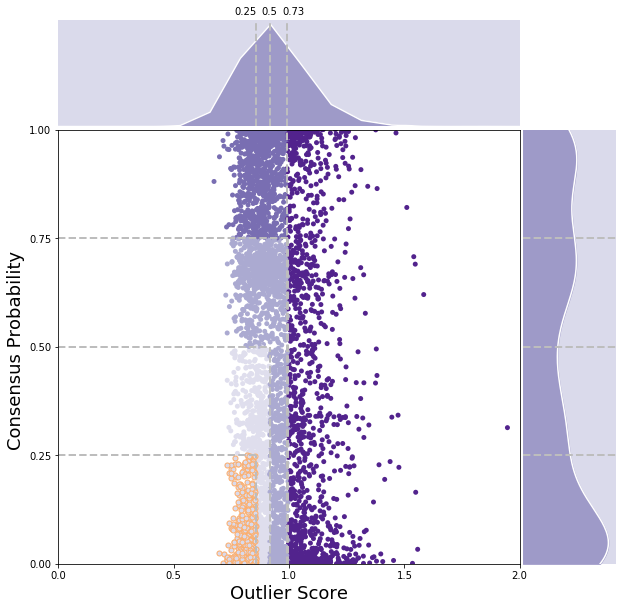

In [13]:
fig = plt.figure(figsize=(10,10))
grid = plt.GridSpec(30, 29)
hemo_probs = simulatedIN_classProbs['consensus_probability_1']
bins = 13
cmap = plt.get_cmap('tab20c')
rgbaPlot = cmap(13)
rgbaBackground = cmap(15)
lineColor = cmap(18)
edgecolor = cmap(6)
cmap2  = plt.get_cmap('Purples', 10)
cmap2 = ListedColormap(cmap2(np.linspace(0.10, 0.80, 5)))#discrete color gradient for scatter
perc25 = np.min(scores_pred[percentile_scores >= 25])
perc50 = np.min(scores_pred[percentile_scores >= 50])
perc75 = np.min(scores_pred[percentile_scores >= 75])
OSthreshold = 0.99
percOSt = 1 - ( np.size(scores_pred[scores_pred > OSthreshold]) / np.size(scores_pred) )
percOSt = np.around(percOSt,2)

### TOP DENSITY
plt.subplot(grid[:6, :24])

#density plot
density = gaussian_kde(scores_pred)
xs = np.linspace(0,np.max(scores_pred),200)
density.covariance_factor = lambda : .25
density._compute_covariance()
a=plt.plot(xs, density(xs), color='white')
plt.fill_between(xs, density(xs), 0, color=rgbaPlot)
plt.ylim(0, 2.9)#specific for this plot
plt.xlim(0, 2)#specific for this plot

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, top=True, left=False, right=False)
plt.tick_params(labelbottom=False, labeltop=True, labelleft=False, labelright=False)
aux1 = np.min(scores_pred[percentile_scores >= 10])
aux2 = np.min(scores_pred[percentile_scores >= 80])
plt.xticks([aux1,perc50,aux2], [.25,.5,percOSt])
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.yticks([], [])
plt.gca().set_facecolor(rgbaBackground)
plt.axvline(x=perc25, lw=2, color=lineColor, linestyle='--')
plt.axvline(x=perc50, lw=2, color=lineColor, linestyle='--')
plt.axvline(x=OSthreshold, lw=2, color=lineColor, linestyle='--')

### SCATTER
plt.subplot(grid[6:, :24])
gradient_APD = np.zeros(len(percentile_scores))
gradient_APD[:] = 4
gradient_APD[scores_pred > .99 ] = 5
gradient_APD[(percentile_scores < 75) & (hemo_probs < .75) ] = 3
gradient_APD[(percentile_scores < 50) & (hemo_probs < .50) ] = 2
gradient_APD[(percentile_scores < 25) & (hemo_probs < .25)] = 1

df = pd.DataFrame({'gradient_APD': gradient_APD})

idx = (percentile_scores < 25) & (hemo_probs < .25)
b=plt.scatter(scores_pred, hemo_probs, c=gradient_APD, cmap=cmap2, s=25, edgecolor='none')
a=plt.scatter(scores_pred[idx], hemo_probs[idx], color=rgbaBackground, edgecolor=edgecolor, s=25)

plt.plot([0, perc25], [.25, .25], '--', lw=2, color=lineColor)
plt.plot([0, perc50], [.50, .50], '--', lw=2, color=lineColor)
plt.plot([0, perc75], [.75, .75], '--', lw=2, color=lineColor)

plt.plot([perc25, perc25], [0, .25], '--', lw=2, color=lineColor)
plt.plot([perc50, perc50], [0, .50], '--', lw=2, color=lineColor)
plt.plot([perc75, perc75], [0, .75], '--', lw=2, color=lineColor)

plt.axvline(x=.99, lw=2, color=lineColor, linestyle='--')

plt.xticks(ticks=[0,.5,1,1.5,2],labels=['0.0','0.5','1.0','1.5','2.0'])
plt.yticks(ticks=[0,.25,.5,.75,1])
plt.xlim((0, 2))
plt.ylim((0, 1))
plt.xlabel('Outlier Score', fontsize=18)
plt.ylabel('Consensus Probability ', fontsize=18)

### RIGTH DENSITY
plt.subplot(grid[6:, 24:])

#density plot
density = gaussian_kde(hemo_probs)
xs = np.linspace(0,1,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
a=plt.plot(density(xs), xs, color='white')
plt.fill_betweenx(xs, density(xs), 0, color=rgbaPlot)
plt.xlim(0, 1.5)#specific for this plot

plt.ylim((0, 1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_facecolor(rgbaBackground)
plt.axhline(y=.25, lw=2, color=lineColor, linestyle='--')
plt.axhline(y=.50, lw=2, color=lineColor, linestyle='--')
plt.axhline(y=.75, lw=2, color=lineColor, linestyle='--')

plt.show()

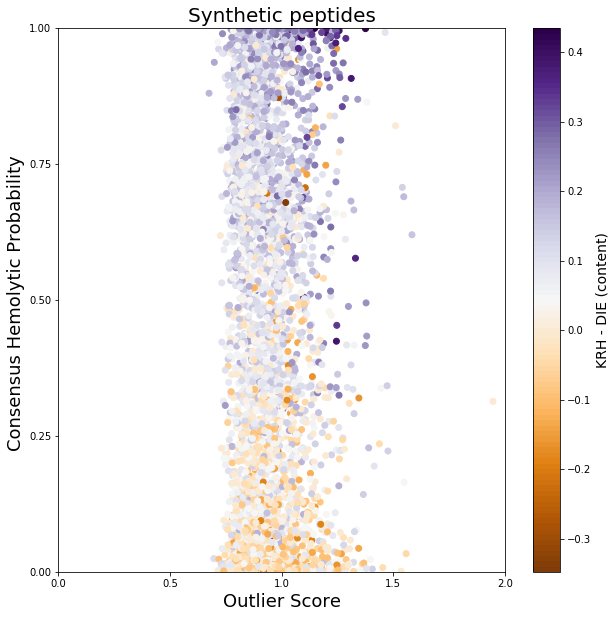

In [14]:
cmap  = plt.get_cmap('PuOr', 100)
fig = plt.figure(figsize=(10,10))
diff = (simulatedIN_AA_df['K']+simulatedIN_AA_df['R']+simulatedIN_AA_df['H'])-(simulatedIN_AA_df['D']+simulatedIN_AA_df['I']+simulatedIN_AA_df['E'])
plt.subplot(111)
a=plt.scatter(scores_pred, simulatedIN_classProbs['consensus_probability_1'], c=diff, cmap=cmap)
plt.xlim(0,2)
plt.ylim(0,1)
plt.xticks(ticks=[0,.5,1,1.5,2],labels=['0.0','0.5','1.0','1.5','2.0'])
plt.yticks(ticks=[0,.25,.5,.75,1])
plt.xlabel('Outlier Score', fontsize=18)
plt.ylabel('Consensus Hemolytic Probability ', fontsize=18)
plt.title('Synthetic peptides', fontsize=20)
b=plt.colorbar()
b.set_label(label='KRH - DIE (content)',size=14)
plt.show() 

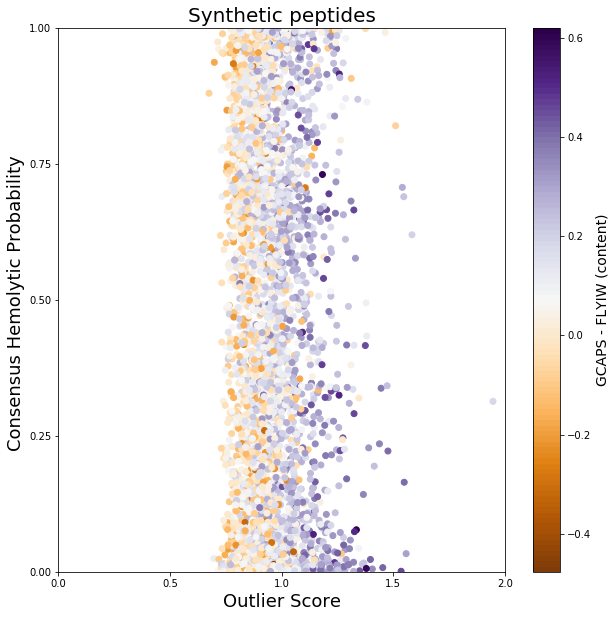

In [15]:
cmap  = plt.get_cmap('PuOr', 100)
fig = plt.figure(figsize=(10,10))#GCAPS - FLYIW
diff = (simulatedIN_AA_df['G']+simulatedIN_AA_df['C']+simulatedIN_AA_df['A']+simulatedIN_AA_df['P']+simulatedIN_AA_df['F'])-(simulatedIN_AA_df['L']+simulatedIN_AA_df['Y']+simulatedIN_AA_df['E']+simulatedIN_AA_df['I']+simulatedIN_AA_df['W'])
plt.subplot(111)
a=plt.scatter(scores_pred, simulatedIN_classProbs['consensus_probability_1'], c=diff, cmap=cmap)
plt.xlim(0,2)
plt.ylim(0,1)
plt.xticks(ticks=[0,.5,1,1.5,2],labels=['0.0','0.5','1.0','1.5','2.0'])
plt.yticks(ticks=[0,.25,.5,.75,1])
plt.xlabel('Outlier Score', fontsize=18)
plt.ylabel('Consensus Hemolytic Probability ', fontsize=18)
plt.title('Synthetic peptides', fontsize=20)
b=plt.colorbar()
b.set_label(label='GCAPS - FLYIW (content)',size=14)
plt.show() 